In [ ]:
#Libraries
import numpy as np
import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

import nltk
nltk.download('wordnet')
# Downloading VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
#Reading all the dataset from computer.
df1 = pd.read_csv('/content/APPLE_iPhone_13_(Starlight,_512_GB)_Reviews.csv')
df2 = pd.read_csv('/content/Flipkart_reviews.csv')
df3 = pd.read_csv('/content/REDMI_10_(Pacific_Blue,_64_GB)_Reviews.csv')
df4 = pd.read_csv('/content/SAMSUNG_Galaxy_F23_5G_(Aqua_Blue,_128_GB)_Reviews.csv')
df5 = pd.read_csv('/content/realme_reviews.csv')

In [ ]:
#selecting "Rating" & "Review_Text" Column and combain them to a new data frame 
df = pd.concat([df1, df2, df3, df4, df5])[["Rating", "Review_Text"]]

In [ ]:
#Save this combained dataset
#df.to_csv("Flipkart_Review_Dataset.csv", index=False)
#df = pd.read_csv('/content/Flipkart_Review_Dataset.csv')

In [ ]:
#Printing basic informations of the dataset
print('\nDATASET INFORMATIONS\n')
print('\nColumn Names:\n',df.columns)
print('\n\nData Types:', df.dtypes)
print('\n\nNull Values:', np.sum(df.isnull().any(axis=1)))
print('\n\nCount of columns in the data is:  ', len(df.columns))
print('\n\nCount of rows in the data is:  ', len(df))


DATASET INFORMATIONS


Column Names:
 Index(['Rating', 'Review_Text'], dtype='object')


Data Types: Rating          int64
Review_Text    object
dtype: object


Null Values: 10


Count of columns in the data is:   2


Count of rows in the data is:   80881


In [ ]:
df['Rating'].unique()

array([1, 2, 3, 4, 5])

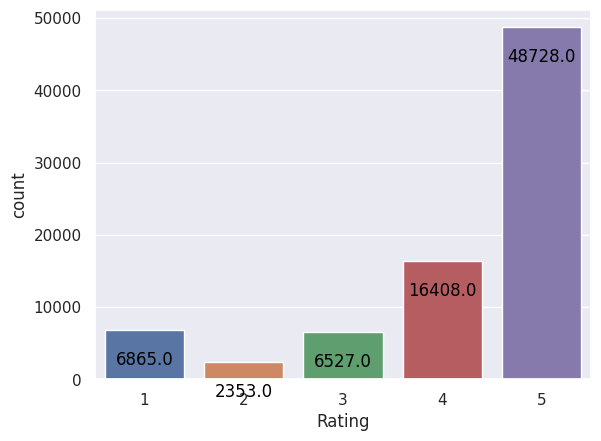

In [ ]:
#Data Visualization of Rating Variables

sns.set(style="darkgrid")
ax = sns.countplot(x="Rating", data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=12)

plt.show()

In [ ]:
# Cleaning reviews
df['Review_Text'] = df['Review_Text'].str.lower().str.replace('[^a-z ]', '')

<ipython-input-5-24ffa42f3507>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Review_Text'] = df['Review_Text'].str.lower().str.replace('[^a-z ]', '')


In [ ]:
df.Review_Text.head()

0    picture quality is amazing you do not need to ...
1    the product was good but the delivery was too ...
2    review after  monthsall of sudden phone dead t...
3    camera lens has dust particlesit has manufactu...
4    it is very worst while replacement with old ip...
Name: Review_Text, dtype: object

In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
#Removing the stop words list from the review text

STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['Review_Text'] = df['Review_Text'].apply(lambda text: cleaning_stopwords(text))
df['Review_Text'].head()

0    picture quality amazing not need think twice b...
1    product good but delivery bad worst experience...
2    review monthsall sudden phone dead taken servi...
3    camera lens dust particlesit manufacturing def...
4    worst replacement old iphonepickup person vend...
Name: Review_Text, dtype: object

In [ ]:
#Cleaning and removing repeating characters

def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df['Review_Text'] = df['Review_Text'].apply(lambda x: cleaning_repeating_char(x))
df['Review_Text'].head()

0    picture quality amazing not need think twice b...
1    product good but delivery bad worst experience...
2    review monthsall sudden phone dead taken servi...
3    camera lens dust particlesit manufacturing def...
4    worst replacement old iphonepickup person vend...
Name: Review_Text, dtype: object

In [ ]:
#Cleaning and removing numeric numbers

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df['Review_Text'] = df['Review_Text'].apply(lambda x: cleaning_numbers(x))
df['Review_Text'].head()

0    picture quality amazing not need think twice b...
1    product good but delivery bad worst experience...
2    review monthsall sudden phone dead taken servi...
3    camera lens dust particlesit manufacturing def...
4    worst replacement old iphonepickup person vend...
Name: Review_Text, dtype: object

In [ ]:
#Cleaning and removing URLs

def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df['Review_Text'] = df['Review_Text'].apply(lambda x: cleaning_URLs(x))
df['Review_Text'].head()

0    picture quality amazing not need think twice b...
1    product good but delivery bad worst experience...
2    review monthsall sudden phone dead taken servi...
3    camera lens dust particlesit manufacturing def...
4    worst replacement old iphonepickup person vend...
Name: Review_Text, dtype: object

In [ ]:
# Converting rating from 1 and 2 as negative, 3 as average and 4,5 as positive
df['Rating_Sentiment'] = df['Rating'].replace({1: 'negative', 2: 'negative', 3: 'average', 4: 'positive', 5: 'positive'})

In [ ]:
df.head()

Rating                                        Review_Text Rating_Sentiment
0       1  picture quality amazing not need think twice b...         negative
1       1  product good but delivery bad worst experience...         negative
2       1  review monthsall sudden phone dead taken servi...         negative
3       1  camera lens dust particlesit manufacturing def...         negative
4       1  worst replacement old iphonepickup person vend...         negative

In [ ]:
#Dividing datas to postitive, average and neagtive to build Wordclouds.

data_pos = df[df['Rating'].isin([4,5])]
data_avg = df[df['Rating'] == 3]
data_neg = df[df['Rating'].isin([1,2])]

<Figure size 2000x2000 with 0 Axes>

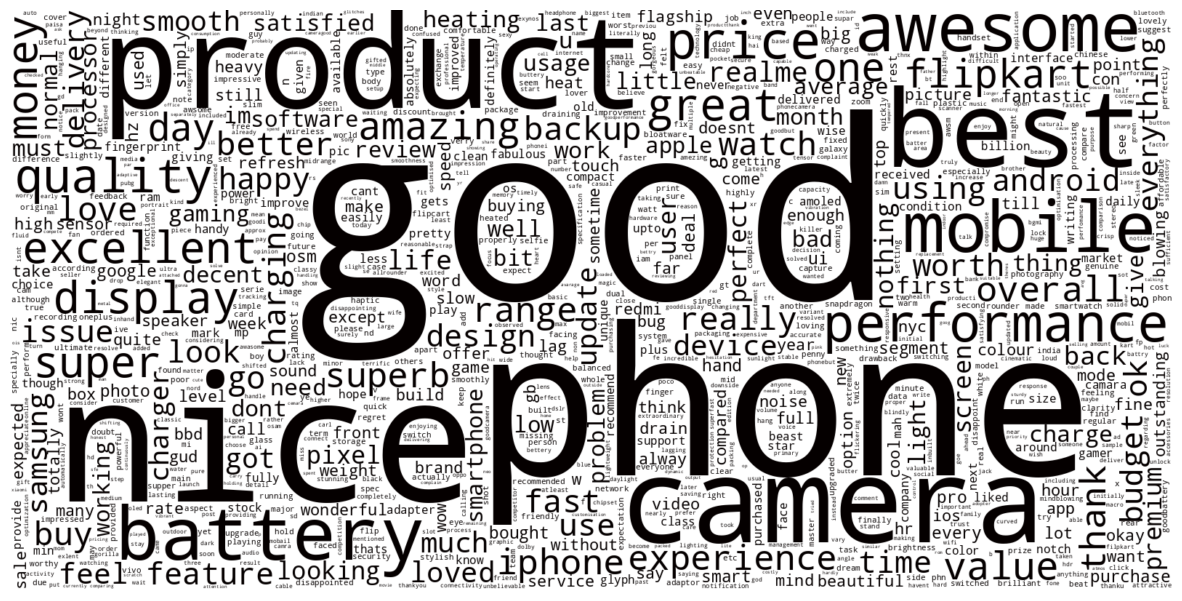

In [ ]:
#Ploting a cloud of words for positive Reviews before analysis

def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

plt.figure(figsize = (20,20))
wc = WordCloud(background_color="white", max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_pos['Review_Text']))
wc.recolor(color_func = black_color_func)
plt.figure(figsize=[15,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('Positive_Reviews_wc.png')

<Figure size 2000x2000 with 0 Axes>

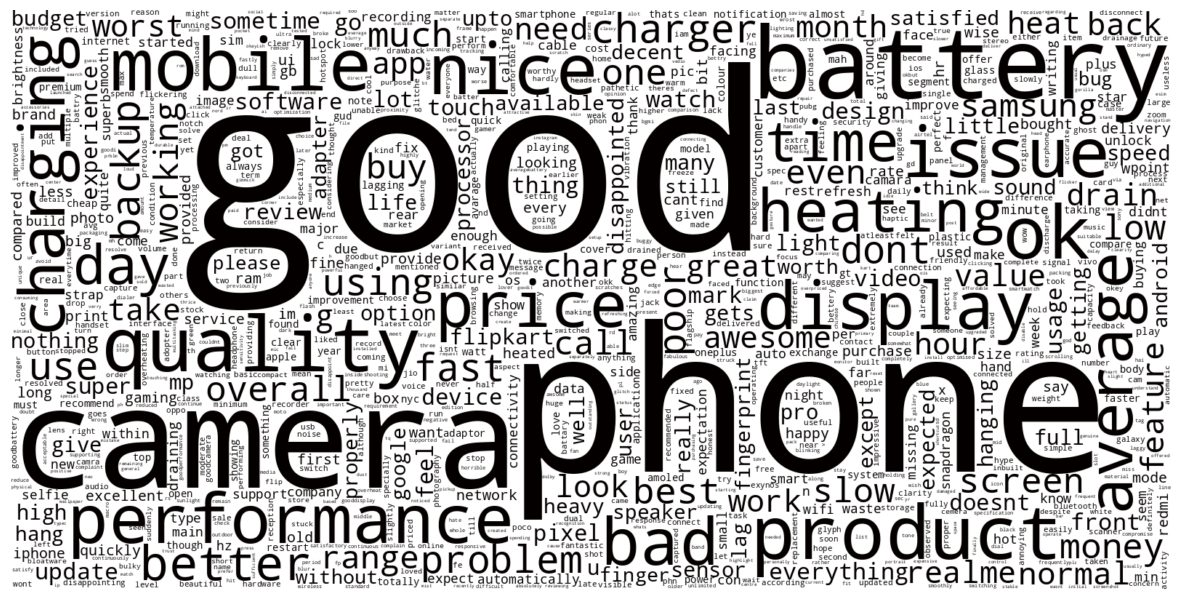

In [ ]:
#Plot a cloud of words for average Reviews before analysis

def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

plt.figure(figsize = (20,20))
wc = WordCloud(background_color="white", max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_avg['Review_Text']))
wc.recolor(color_func = black_color_func)
plt.figure(figsize=[15,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('Average_Reviews_wc.png')

<Figure size 2000x2000 with 0 Axes>

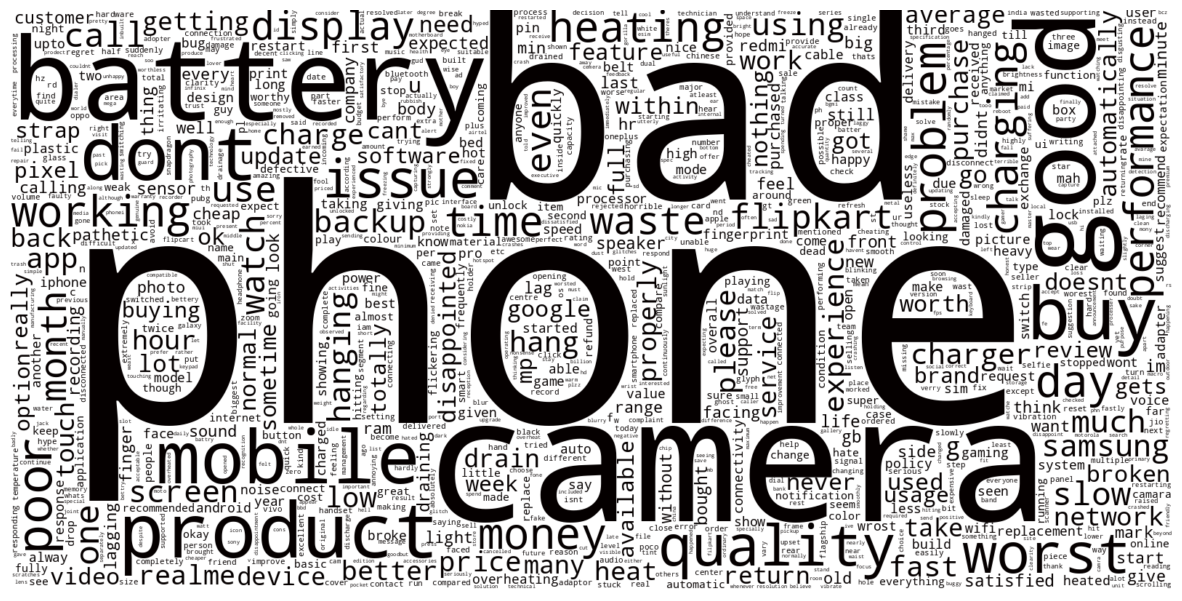

In [ ]:
#Plot a cloud of words for negative Reviews before analysis

def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

plt.figure(figsize = (20,20))
wc = WordCloud(background_color="white", max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_neg['Review_Text']))
wc.recolor(color_func = black_color_func)
plt.figure(figsize=[15,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('Negative_Reviews_wc.png')

In [ ]:
# Initializing VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [ ]:
# Applying VADER sentiment analyzer on each review
df['sentiment_score'] = df['Review_Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [ ]:
df.head()

Rating                                        Review_Text Rating_Sentiment  \
0       1  picture quality amazing not need think twice b...         negative   
1       1  product good but delivery bad worst experience...         negative   
2       1  review monthsall sudden phone dead taken servi...         negative   
3       1  camera lens dust particlesit manufacturing def...         negative   
4       1  worst replacement old iphonepickup person vend...         negative   

   sentiment_score  
0           0.9538  
1          -0.8873  
2          -0.6486  
3           0.1149  
4          -0.7447

In [ ]:
print("Sentiment Score Minimum:", df['sentiment_score'].min())
print("Sentiment Score Maximum:", df['sentiment_score'].max())

Sentiment Score Minimum: -0.9816
Sentiment Score Maximum: 0.9978


In [ ]:
# Categorizing reviews into good, neutral and bad based on their sentiment score
df['Predicted_Rating_sentiment'] = pd.cut(df['sentiment_score'], bins=[-1, -0.05, 0.05, 1], labels=['negative', 'average', 'positive'])
df = df.astype({'Predicted_Rating_sentiment':'str'})

df['Predicted_Rating'] = pd.cut(df['sentiment_score'], bins=[-1, -0.6, -0.2, 0.2, 0.6, 1], labels=[1, 2, 3, 4, 5])
df = df.astype({'Predicted_Rating':'int'})

In [ ]:
df.head()

Rating                                        Review_Text Rating_Sentiment  \
0       1  picture quality amazing not need think twice b...         negative   
1       1  product good but delivery bad worst experience...         negative   
2       1  review monthsall sudden phone dead taken servi...         negative   
3       1  camera lens dust particlesit manufacturing def...         negative   
4       1  worst replacement old iphonepickup person vend...         negative   

   sentiment_score Predicted_Rating_sentiment  Predicted_Rating  
0           0.9538                   positive                 5  
1          -0.8873                   negative                 1  
2          -0.6486                   negative                 1  
3           0.1149                   positive                 3  
4          -0.7447                   negative                 1

In [ ]:
# Checking accuracy of the model
print('Accuracy:', accuracy_score(df['Rating_Sentiment'], df['Predicted_Rating_sentiment']))

Accuracy: 0.8133677872429866


In [ ]:
print("Original Rating:",round(df['Rating'].mean(),2),"/ 5")
print("Predicted Rating using review text analysis:",round(df['Predicted_Rating'].mean(),2),"/ 5")

Original Rating: 4.21 / 5
Predicted Rating using review text analysis: 3.94 / 5


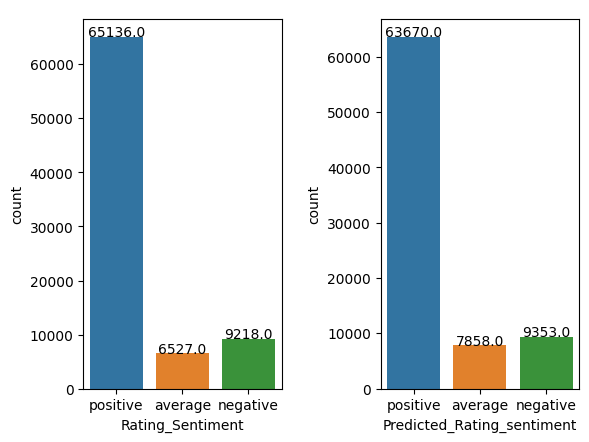

In [ ]:

#Data Visualization of Sentiment of Original Rating & Predicted Rating

fig, ax =plt.subplots(1,2)
variable_order = ["positive", "average", "negative"]

sns.countplot(x='Rating_Sentiment', data=df, ax=ax[0],order=variable_order)
sns.countplot(x='Predicted_Rating_sentiment', data=df,  ax=ax[1],order=variable_order)

for p in ax[0].patches:
    ax[0].annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black')

for p in ax[1].patches:
    ax[1].annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black')

plt.subplots_adjust(wspace=0.5)

fig.show()  

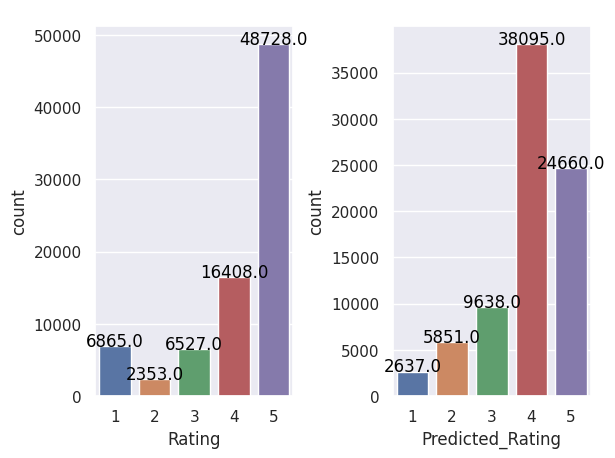

In [ ]:
#Data Visualization of Original Rating & Predicted Rating
fig, ax =plt.subplots(1,2)
sns.countplot(x='Rating', data=df, ax=ax[0])
sns.countplot(x='Predicted_Rating', data=df,  ax=ax[1])

for p in ax[0].patches:
    ax[0].annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black')

for p in ax[1].patches:
    ax[1].annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black')
plt.subplots_adjust(wspace=0.5)
fig.show()  


<Figure size 2000x2000 with 0 Axes>

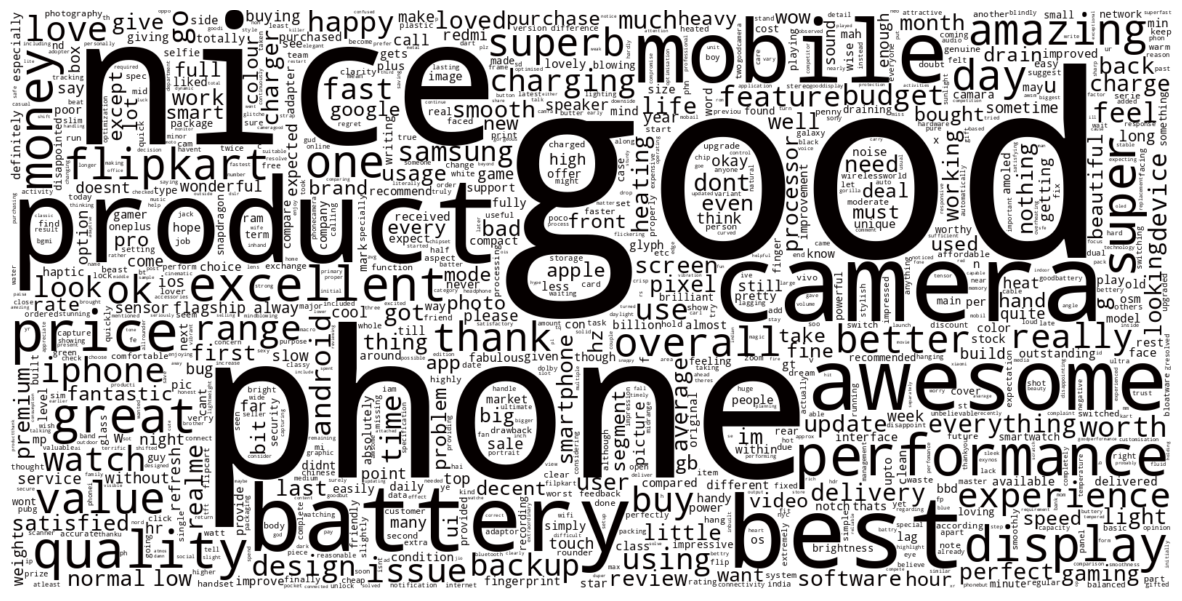

<Figure size 2000x2000 with 0 Axes>

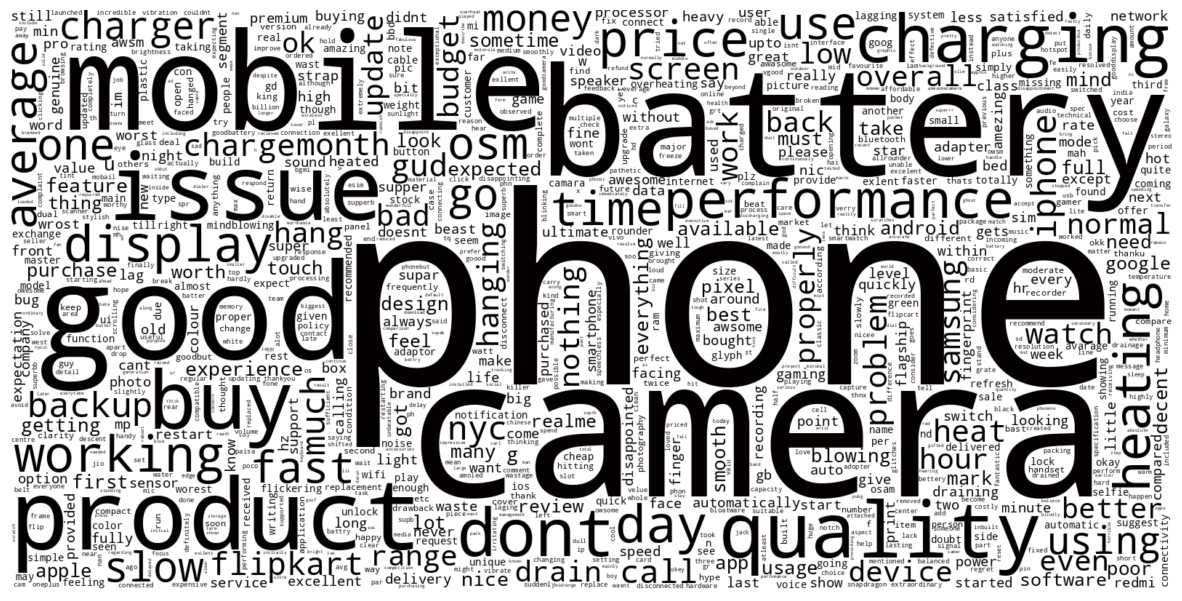

<Figure size 2000x2000 with 0 Axes>

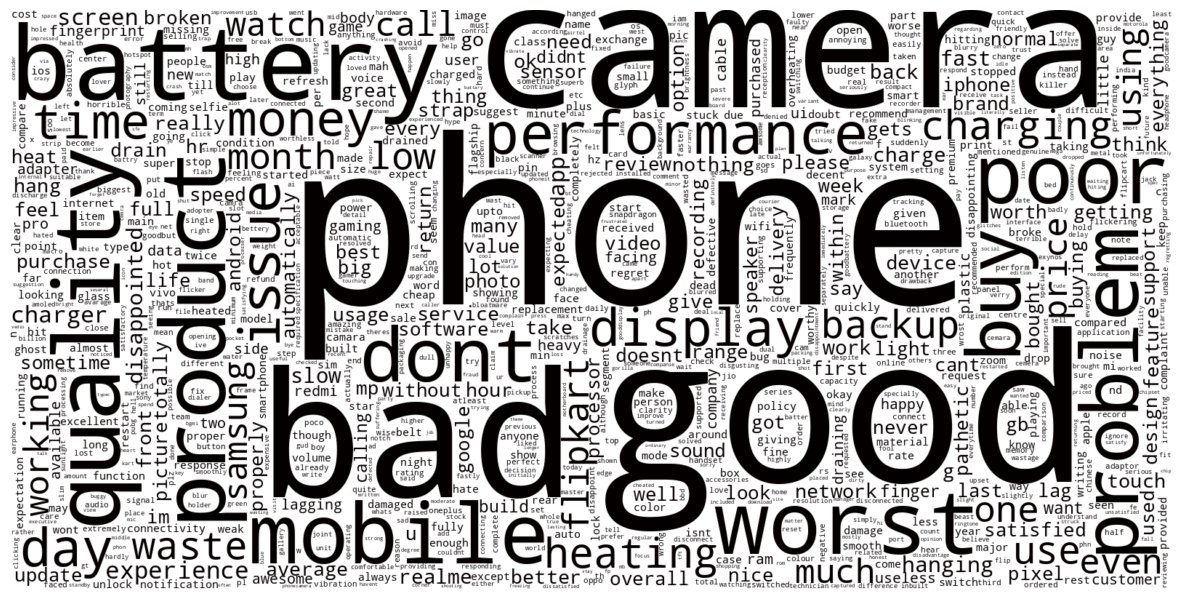

In [ ]:
#Generating word clod after the analysis. using this, we can compare both the wordcloud to understand the analysis

data_pos = df[df['Predicted_Rating'].isin([4,5])]
data_avg = df[df['Predicted_Rating'] == 3]
data_neg = df[df['Predicted_Rating'].isin([1,2])]


#Plot a cloud of words for positive Reviews after analysis

def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

plt.figure(figsize = (20,20))
wc = WordCloud(background_color="white", max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_pos['Review_Text']))
wc.recolor(color_func = black_color_func)
plt.figure(figsize=[15,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('Positive_Reviews_wc_new.png')

#Plot a cloud of words for average Reviews after analysis

def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

plt.figure(figsize = (20,20))
wc = WordCloud(background_color="white", max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_avg['Review_Text']))
wc.recolor(color_func = black_color_func)
plt.figure(figsize=[15,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('Average_Reviews_wc_new.png')

#Plot a cloud of words for negative Reviews after analysis

def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

plt.figure(figsize = (20,20))
wc = WordCloud(background_color="white", max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_neg['Review_Text']))
wc.recolor(color_func = black_color_func)
plt.figure(figsize=[15,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('Negative_Reviews_wc_new.png')

In [ ]:
#Generating Confusion Matrix for individual ratings

# Unique ratings
ratings = df['Rating'].unique()

# Calculate confusion matrix for each rating
for rating in ratings:
    y_true = df['Rating'] == rating
    y_pred = df['Predicted_Rating'] == rating
    cm = confusion_matrix(y_true, y_pred)
    print(f"Confusion matrix for rating {rating}:")
    print(cm)
    print()

Confusion matrix for rating 1:
[[73013  1003]
 [ 5231  1634]]

Confusion matrix for rating 2:
[[73600  4928]
 [ 1430   923]]

Confusion matrix for rating 3:
[[66239  8115]
 [ 5004  1523]]

Confusion matrix for rating 4:
[[36035 28438]
 [ 6751  9657]]

Confusion matrix for rating 5:
[[26271  5882]
 [29950 18778]]



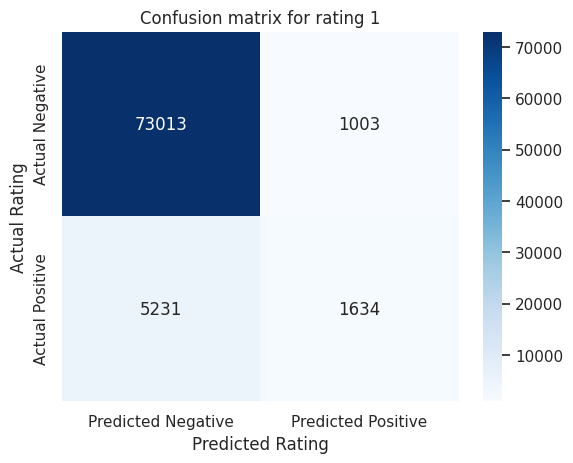

Accuracy: 0.92



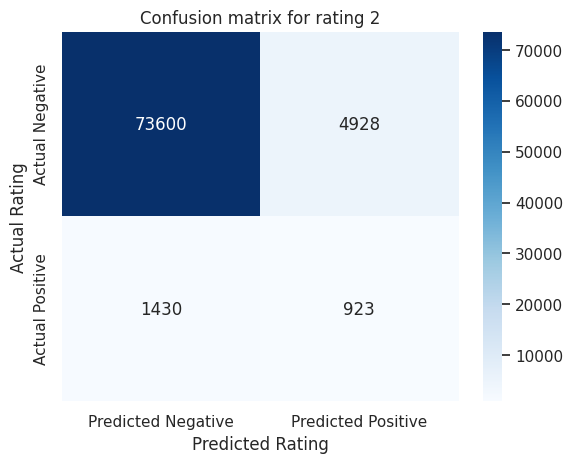

Accuracy: 0.92



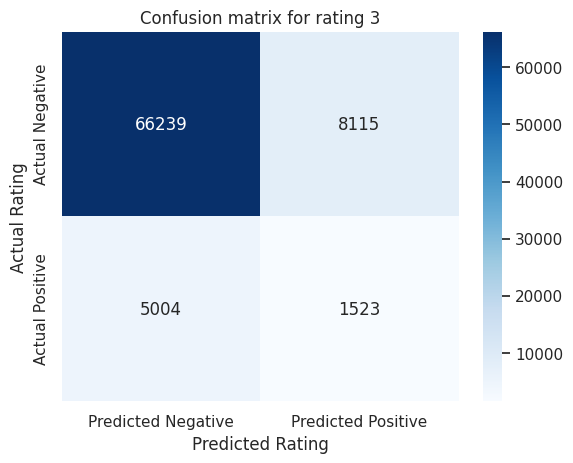

Accuracy: 0.84



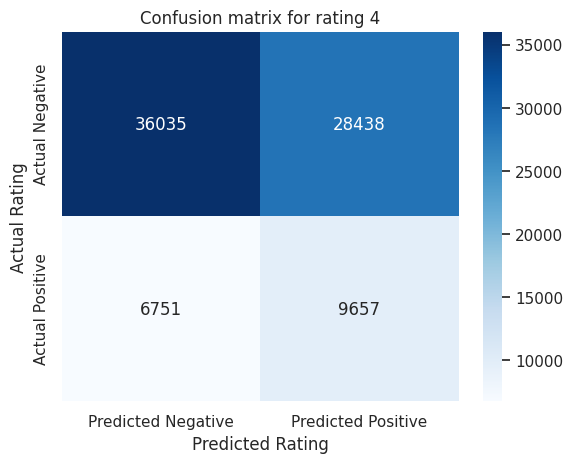

Accuracy: 0.56



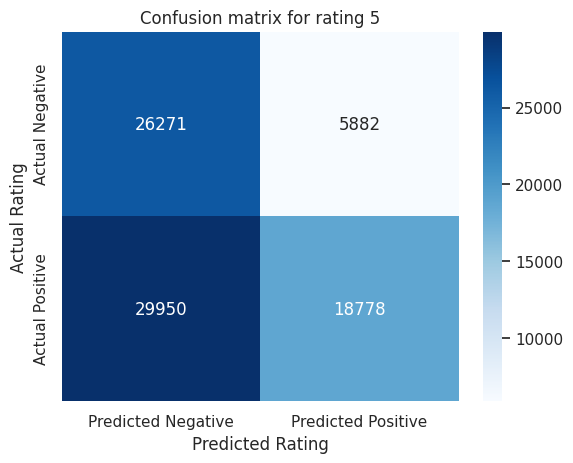

Accuracy: 0.56



In [ ]:
#Generating Confusion Matrix for individual ratings in image format

# Unique ratings
ratings = df['Rating'].unique()

# Calculate confusion matrix for each rating
for rating in ratings:
    y_true = df['Rating'] == rating
    y_pred = df['Predicted_Rating'] == rating
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
    plt.figure()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
    plt.title(f"Confusion matrix for rating {rating}")
    plt.xlabel('Predicted Rating')
    plt.ylabel('Actual Rating')
    plt.show()

    # Calculate accuracy
    accuracy = np.diag(cm).sum() / cm.sum()
    print(f"Accuracy: {accuracy:.2f}")
    print()


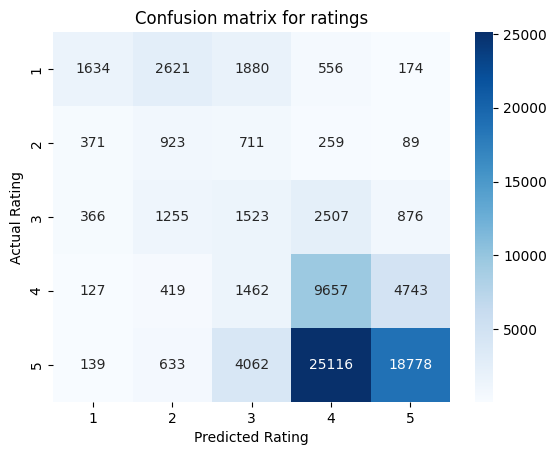

Overall Accuracy: 0.40


In [ ]:
#Generating Confusion Matrix for all ratings

cm = confusion_matrix(df['Rating'], df['Predicted_Rating'])
cm_df = pd.DataFrame(cm, index=['1', '2','3','4','5'], columns=['1', '2','3','4','5'])
plt.figure()
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion matrix for ratings")
plt.xlabel('Predicted Rating')
plt.ylabel('Actual Rating')
plt.show()

overall_accuracy = np.diag(cm).sum() / cm.sum()
print(f"Overall Accuracy: {overall_accuracy:.2f}")


In [ ]:
#Saving / exporting the dataset after analysis.
df.to_csv("Flipkart_Review_After_Analysis.csv", index=False)